# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis with pandas. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [661]:
# Import the appropriate libraries with aliases
import pandas as pd
import numpy as np

# Create two new dataframes
north_df = pd.read_csv('NorthCallCenter.csv')
south_df = pd.read_csv('SouthCallCenter.csv')

NORTH

In [662]:
north_df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


In [663]:
north_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             245 non-null    int64  
 1   Branch                 245 non-null    object 
 2   Call Purpose           245 non-null    object 
 3   Time Block             245 non-null    object 
 4   Incoming or Outgoing   245 non-null    object 
 5   Queue                  245 non-null    object 
 6   Rep ID                 245 non-null    object 
 7   Sale                   245 non-null    object 
 8   Lost Call              245 non-null    int64  
 9   Abandoned              245 non-null    int64  
 10  Busy Minutes           245 non-null    int64  
 11  Not Ready Minutes      245 non-null    int64  
 12  Incoming Wait Time     82 non-null     float64
 13  During Call Wait Time  245 non-null    int64  
 14  Calls                  245 non-null    int64  
dtypes: flo

In [664]:
north_df.describe()

,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
count,245.000000,245.000000,245.000000,245.000000,245.000000,82.000000,245.000000,245.0
mean,122.000000,0.020408,0.028571,9.987755,1.914286,3.048780,2.967347,1.0
std,70.869599,0.141681,0.166940,1.403980,0.771416,1.456382,0.843827,0.0
min,0.000000,0.000000,0.000000,8.000000,1.000000,1.000000,2.000000,1.0
25%,61.000000,0.000000,0.000000,9.000000,1.000000,2.000000,2.000000,1.0
50%,122.000000,0.000000,0.000000,10.000000,2.000000,3.000000,3.000000,1.0
75%,183.000000,0.000000,0.000000,11.000000,3.000000,4.000000,4.000000,1.0
max,244.000000,1.000000,1.000000,12.000000,3.000000,5.000000,4.000000,1.0


In [665]:
north_df.shape

(245, 15)

SOUTH

In [666]:
south_df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1


In [667]:
south_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             314 non-null    int64  
 1   Branch                 314 non-null    object 
 2   Call Purpose           314 non-null    object 
 3   Time Block             314 non-null    object 
 4   Incoming or Outgoing   314 non-null    object 
 5   Queue                  314 non-null    object 
 6   Rep ID                 314 non-null    object 
 7   Sale                   314 non-null    object 
 8   Lost Call              314 non-null    int64  
 9   Abandoned              314 non-null    int64  
 10  Busy Minutes           314 non-null    int64  
 11  Not Ready Minutes      314 non-null    int64  
 12  Incoming Wait Time     126 non-null    float64
 13  During Call Wait Time  314 non-null    int64  
 14  Calls                  314 non-null    int64  
dtypes: flo

In [668]:
south_df.describe()

,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
count,314.000000,314.000000,314.000000,314.00000,314.000000,126.000000,314.000000,314.0
mean,156.500000,0.035032,0.012739,10.05414,1.910828,3.000000,3.076433,1.0
std,90.788215,0.184154,0.112324,1.40751,0.860016,1.308434,0.819424,0.0
min,0.000000,0.000000,0.000000,8.00000,1.000000,1.000000,2.000000,1.0
25%,78.250000,0.000000,0.000000,9.00000,1.000000,2.000000,2.000000,1.0
50%,156.500000,0.000000,0.000000,10.00000,2.000000,3.000000,3.000000,1.0
75%,234.750000,0.000000,0.000000,11.00000,3.000000,4.000000,4.000000,1.0
max,313.000000,1.000000,1.000000,12.00000,3.000000,5.000000,4.000000,1.0


In [669]:
south_df.shape

(314, 15)

## Task 1: Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. Use the code blocks below to begin cleaning your data. At the end of the section, record your answers.

#### EDA Question 1A:  How many reps are in the North branch?  

In [670]:
# EDA Question 1A solution below:
north_df['Rep ID'].value_counts(dropna=False)


Rep ID
Brent     37
Lilly     30
Todd      29
Duke      29
Joe       26
Cam       24
Xander    24
Amanda    23
Andy      23
Name: count, dtype: int64

#### EDA Question 1B:  How many reps are in the South branch?  

In [671]:
# EDA Question 1B solution Below:
south_df['Rep ID'].value_counts(dropna=False)

Rep ID
Eric      35
Randy     33
Sandy     32
Helga     31
Kate      29
George    29
Karl      28
Susan     26
Josh      26
Sharon    25
Alice     20
Name: count, dtype: int64

#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [672]:
# EDA Question 2A solution Below:
north_df['Busy Minutes'].mean().round(2)

np.float64(9.99)

In [673]:
north_df['Not Ready Minutes'].mean().round(2)

np.float64(1.91)

In [674]:
north_df['Incoming Wait Time'].mean().round(2)

np.float64(3.05)

In [675]:
north_df['During Call Wait Time'].mean().round(2)

np.float64(2.97)

#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [676]:
# EDA Question 2B solution Below:
south_df['Busy Minutes'].mean().round(2)

np.float64(10.05)

In [677]:
south_df['Not Ready Minutes'].mean().round(2)

np.float64(1.91)

In [678]:
south_df['Incoming Wait Time'].mean().round(2)

np.float64(3.0)

In [679]:
south_df['During Call Wait Time'].mean().round(2)

np.float64(3.08)

#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [680]:
# EDA Question 3 solution Below:
#combining datafamres
combined_df = pd.concat([north_df, south_df])
combined_df

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
310,310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
311,311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
312,312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1


In [681]:
combined_df['Time Block'].value_counts().sort_index()


Time Block
10:00 AM     99
11:00 AM     56
12:00 PM    120
1:00 PM      40
2:00 PM      65
3:00 PM      73
4:00 PM      53
5:00 PM      43
9:00 AM      10
Name: count, dtype: int64

##### Record your answers for the EDA section below:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.99
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.05
> - During Call Wait Time = 2.97
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05 
> - Not Ready Minutes = 1.91 
> - Incoming Wait Time = 3.0
> - During Call Wait Time = 3.08
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43



## Task 2: Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?

North

In [682]:
#checking for missing data
for col in north_df.columns:
    pct_missing = np.mean(north_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0%
Branch - 0%
Call Purpose - 0%
Time Block - 0%
Incoming or Outgoing - 0%
Queue - 0%
Rep ID - 0%
Sale - 0%
Lost Call - 0%
Abandoned - 0%
Busy Minutes - 0%
Not Ready Minutes - 0%
Incoming Wait Time - 67%
During Call Wait Time - 0%
Calls - 0%


In [683]:
#checking values in the column with missing data
north_df['Incoming Wait Time'].value_counts().sort_index()

Incoming Wait Time
1.0    17
2.0    16
3.0    12
4.0    20
5.0    17
Name: count, dtype: int64

In [684]:
#renaming column
north_df = north_df.rename(columns={'Unnamed: 0':'Call Number'})
north_df.columns.tolist()

['Call Number',
 'Branch',
 'Call Purpose',
 'Time Block',
 'Incoming or Outgoing',
 'Queue',
 'Rep ID',
 'Sale',
 'Lost Call',
 'Abandoned',
 'Busy Minutes',
 'Not Ready Minutes',
 'Incoming Wait Time',
 'During Call Wait Time',
 'Calls']

In [685]:
north_df['Incoming Wait Missing'] = north_df['Incoming Wait Time'].isna().astype(int)

South

In [686]:
#checking for missing data
for col in south_df.columns:
    pct_missing = np.mean(south_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0%
Branch - 0%
Call Purpose - 0%
Time Block - 0%
Incoming or Outgoing - 0%
Queue - 0%
Rep ID - 0%
Sale - 0%
Lost Call - 0%
Abandoned - 0%
Busy Minutes - 0%
Not Ready Minutes - 0%
Incoming Wait Time - 60%
During Call Wait Time - 0%
Calls - 0%


In [687]:
south_df['Incoming Wait Time'].value_counts().sort_index()

Incoming Wait Time
1.0    20
2.0    28
3.0    29
4.0    30
5.0    19
Name: count, dtype: int64

In [688]:
#renamed column
south_df = south_df.rename(columns={'Unnamed: 0':'Call Number'})
south_df.columns.tolist()

['Call Number',
 'Branch',
 'Call Purpose',
 'Time Block',
 'Incoming or Outgoing',
 'Queue',
 'Rep ID',
 'Sale',
 'Lost Call',
 'Abandoned',
 'Busy Minutes',
 'Not Ready Minutes',
 'Incoming Wait Time',
 'During Call Wait Time',
 'Calls']

In [689]:
#repeated same step for south
south_df['Incoming Wait Missing'] = south_df['Incoming Wait Time'].isna().astype(int)

#### Record your answer below:

> Your Answer: Both datasets had missing values in the "Incoming Wait Time" column. I created a flag column to indicate missing values and then retained them as NaN in the dataset. This ensures missing data is not misinterpreted as 0 seconds. 

#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?

In [690]:
# Cleaning Question 2 solution below:
#count how many values are inconsistent
north_df['Sale'].value_counts()


Sale
NO      234
YES      10
YES       1
Name: count, dtype: int64

In [691]:
#remove any leading or trailing whitespace, and ensure all letters are uppercase
#redefine column
north_df['Sale'] = north_df['Sale'].str.strip().str.upper()
north_df['Sale'].value_counts()

Sale
NO     234
YES     11
Name: count, dtype: int64

##### Record your answer by below:
> Your Answer: I used value_counts to count how many of each value there was. Noticed there was only one YES value that was different from the rest. Started with removing whitespaces and ensuring all data was uppercase, and that fixed the single inconsistnt value. 

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?

NORTH

In [692]:
# Cleaning Question 3 solution below:
north_df.duplicated().sum()


np.int64(0)

SOUTH

In [693]:
south_df.duplicated().sum()

np.int64(0)

##### Record your answer below:
> Your Answer: No, there is no duplicated data in either data set

#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [694]:
# Cleaning Question 4 solution below:
north_df = north_df.drop(columns=['Lost Call'])

In [695]:
south_df = south_df.drop(columns=["Lost Call"])

##### Record your answer below:
> Your Answer: I dropped the 'Lost Call' column because it relates to technical error and that could not be necessary to answer the question about rep efficiency. 

## Task 3: Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer below.

In [696]:
# Create dataframe for the entire company named df
df = pd.concat([north_df, south_df])
df

,Call Number,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls,Incoming Wait Missing
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,1,9,2,1.0,4,1,0
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,11,1,1.0,3,1,0
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,9,3,1.0,3,1,0
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,11,2,1.0,4,1,0
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,8,2,1.0,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,10,3,NaN,4,1,1
310,310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,12,3,NaN,4,1,1
311,311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,9,3,NaN,4,1,1
312,312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,10,1,NaN,2,1,1


#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

In [697]:
# Manipulation Question solution below:
df.groupby('Rep ID').sum()

,Call Number,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Sale,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls,Incoming Wait Missing
Rep ID,,,,,,,,,,,,,,
Alice,3637,SouthSouthSouthSouthSouthSouthSouthSouthSouthS...,Sales SupportProduct SupportProduct SupportSal...,10:00 AM5:00 PM5:00 PM1:00 PM10:00 AM2:00 PM10...,IncomingIncomingIncomingIncomingIncomingIncomi...,CCCCCCCCCCCCCCCCCCCC,NONONONONONONONONONONONONONONONONONONONO,0,199,46,15.0,58,20,14
Amanda,2666,NorthNorthNorthNorthNorthNorthNorthNorthNorthN...,Product SupportProduct SupportProduct SupportS...,4:00 PM12:00 PM1:00 PM10:00 AM10:00 AM11:00 AM...,IncomingIncomingIncomingIncomingIncomingOutgoi...,AAAAAAAAAAAAAAAAAAAAAAA,NONONONOYESNONONONONONONONONONONONONONONONONONO,1,229,43,12.0,60,23,18
Andy,2494,NorthNorthNorthNorthNorthNorthNorthNorthNorthN...,ComplaintSales SupportProduct SupportProduct S...,2:00 PM1:00 PM3:00 PM5:00 PM12:00 PM11:00 AM3:...,IncomingIncomingIncomingIncomingIncomingIncomi...,AAAAAAAAAAAAAAAAAAAAAAA,NONONONONONONOYESNONONOYESNONONONONONONONONONONO,3,228,43,36.0,65,23,13
Brent,4840,NorthNorthNorthNorthNorthNorthNorthNorthNorthN...,ComplaintSales SupportProduct SupportComplaint...,9:00 AM4:00 PM12:00 PM12:00 PM3:00 PM1:00 PM10...,IncomingIncomingIncomingIncomingIncomingIncomi...,BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB,NONONONONONONONONONONONONONONONONONONONONONONO...,1,362,71,17.0,117,37,29
Cam,2746,NorthNorthNorthNorthNorthNorthNorthNorthNorthN...,Sales SupportProduct SupportProduct SupportPro...,11:00 AM3:00 PM3:00 PM4:00 PM12:00 PM11:00 AM2...,IncomingIncomingIncomingIncomingIncomingIncomi...,AAAAAAAAAAAAAAAAAAAAAAAA,NONONONONONONONONONONONONONONONONONONONONONOYESNO,0,233,46,32.0,66,24,13
Duke,2999,NorthNorthNorthNorthNorthNorthNorthNorthNorthN...,Product SupportProduct SupportComplaintComplai...,2:00 PM3:00 PM9:00 AM1:00 PM10:00 AM12:00 PM10...,IncomingIncomingIncomingIncomingIncomingIncomi...,BBBBBBBBBBBBBBBBBBBBBBBBBBBBB,NONONONONONONONONONONONONONONONONONONONONONONO...,0,292,56,39.0,85,29,15
Eric,5039,SouthSouthSouthSouthSouthSouthSouthSouthSouthS...,Sales SupportComplaintSales SupportSales Suppo...,10:00 AM1:00 PM10:00 AM12:00 PM2:00 PM3:00 PM3...,IncomingIncomingIncomingIncomingIncomingIncomi...,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC,NONONONONONONONONONONONONONONONONONONONONONONO...,0,361,54,47.0,112,35,17
George,4620,SouthSouthSouthSouthSouthSouthSouthSouthSouthS...,Product SupportProduct SupportProduct SupportC...,3:00 PM4:00 PM2:00 PM12:00 PM10:00 AM4:00 PM3:...,IncomingIncomingIncomingIncomingIncomingIncomi...,DDDDDDDDDDDDDDDDDDDDDDDDDDDDD,NONONONONONONONONONONONONONONONONONONONONONONO...,0,298,53,41.0,87,29,16
Helga,5236,SouthSouthSouthSouthSouthSouthSouthSouthSouthS...,Product SupportComplaintComplaintSales Support...,3:00 PM3:00 PM5:00 PM10:00 AM11:00 AM3:00 PM11...,IncomingIncomingIncomingIncomingIncomingIncomi...,DDDDDDDDDDDDDDDDDDDDDDDDDDDDDDD,NONONONONONONONONONONONONONONONONONONONONONONO...,2,292,58,36.0,95,31,20


In [698]:
# Manipulation Question solution below:
#I used count instead of sum because sum was giving me inflated numbers of calls by summing the call number, instead of counting each call number as a single call. 
df.groupby(['Branch','Rep ID'])['Call Number'].count().sort_values(ascending=False)

Branch  Rep ID
North   Brent     37
South   Eric      35
        Randy     33
        Sandy     32
        Helga     31
North   Lilly     30
        Todd      29
South   George    29
        Kate      29
North   Duke      29
South   Karl      28
North   Joe       26
South   Susan     26
        Josh      26
        Sharon    25
North   Cam       24
        Xander    24
        Andy      23
        Amanda    23
South   Alice     20
Name: Call Number, dtype: int64

##### Record your answer below
Rep with the hightest number of calls and their total calls:
- North Branch = Brent
- South Branch = Eric

#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?

In [699]:
#north avg

north_df.agg({'Abandoned' : 'mean'})

Abandoned    0.028571
dtype: float64

In [700]:
#north avg as percent

north_avg = north_df.agg({'Abandoned' : 'mean'}).round(4)
print(north_avg * 100)

Abandoned    2.86
dtype: float64


In [701]:
#south avg

south_df.agg({'Abandoned' : 'mean'})

Abandoned    0.012739
dtype: float64

In [702]:
# south avg as percent

south_avg = south_df.agg({'Abandoned' : 'mean'}).round(4)
print(south_avg * 100)

Abandoned    1.27
dtype: float64


In [703]:
#combined avg

df.agg({'Abandoned': 'mean'})

Abandoned    0.019678
dtype: float64

In [704]:
#combined avg as percent

df_avg = df.agg({'Abandoned': 'mean'}).round(4)
print(df_avg * 100)

Abandoned    1.97
dtype: float64


##### Record your answer below:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.86
- South Branch = 1.27
- Company Wide = 1.97
- Do any of these fall out of the optimal range of 2-5%? No, they are all within the optimal range. With the South branch being well under.

#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?

North

In [705]:
#out of total calls
north_df.agg(
        num_calls = ('Incoming Wait Time', 'count'),
        pct_in_2_sec = ('Incoming Wait Time', lambda x: ((x <= 2).mean() * 100).round(2))
)

,Incoming Wait Time
num_calls,82.00
pct_in_2_sec,13.47


South

In [706]:
#out of total calls
south_df.agg(
        num_calls = ('Incoming Wait Time', 'count'),
        pct_in_2_sec = ('Incoming Wait Time', lambda x: ((x <= 2).mean() * 100).round(2))
)

,Incoming Wait Time
num_calls,126.00
pct_in_2_sec,15.29


Combined

In [707]:
#out of total calls
df.agg(
        num_calls = ('Incoming Wait Time', 'count'),
        pct_in_2_sec = ('Incoming Wait Time', lambda x: ((x <= 2).mean() * 100).round(2))
)

,Incoming Wait Time
num_calls,208.00
pct_in_2_sec,14.49


##### Record your answer below:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 13.47% out of 245 calls, only 82 calls had data in this column.
- South Branch = 15.29% out of 314 calls, only 126 calls had data in this column
- Company Wide = 14.49% out of 559 calls, only 208 calls had data in this column

#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?

North

In [708]:
north_df.agg(
    avg_speed = ('Incoming Wait Time', lambda x : x.mean().round(2))
)

,Incoming Wait Time
avg_speed,3.05


South

In [709]:
south_df.agg(
    avg_speed = ('Incoming Wait Time', lambda x : x.mean().round(2))
)

,Incoming Wait Time
avg_speed,3.0


Combined

In [710]:
df.agg(
    avg_speed = ('Incoming Wait Time', lambda x : x.mean().round(2))
)

,Incoming Wait Time
avg_speed,3.02


##### Record your answer by below:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.05 seconds
- South Branch in seconds = 3.00 seconds
- Company Wide in seconds = 3.02 seconds

## Task 4: Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?

C:\Users\melha\AppData\Local\Temp\ipykernel_12136\1466574378.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i]


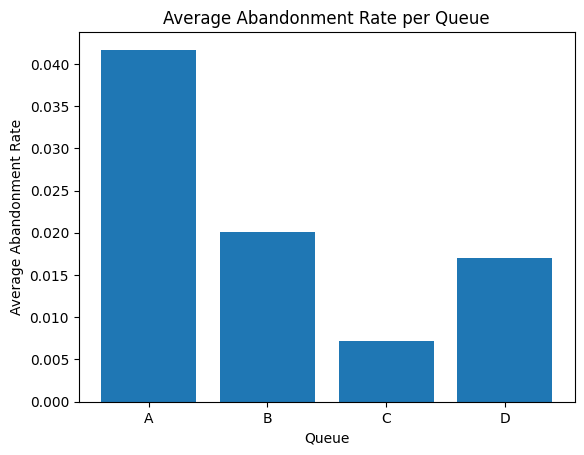

In [711]:
# Create visualization 1 here
# Import any additional libraries needed with alias

import matplotlib.pyplot as plt

# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 

#Your code below:
plt.figure()
plt.bar(
    abandonment_rates.keys(),
    abandonment_rates.values()
)
plt.xlabel('Queue')
plt.ylabel('Average Abandonment Rate')
plt.title('Average Abandonment Rate per Queue')
plt.show()

##### Record your answer below:

> Chart style you chose and why: I chose Bar Chart because it is ideal for comparing a metric across categories(queues)

#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?

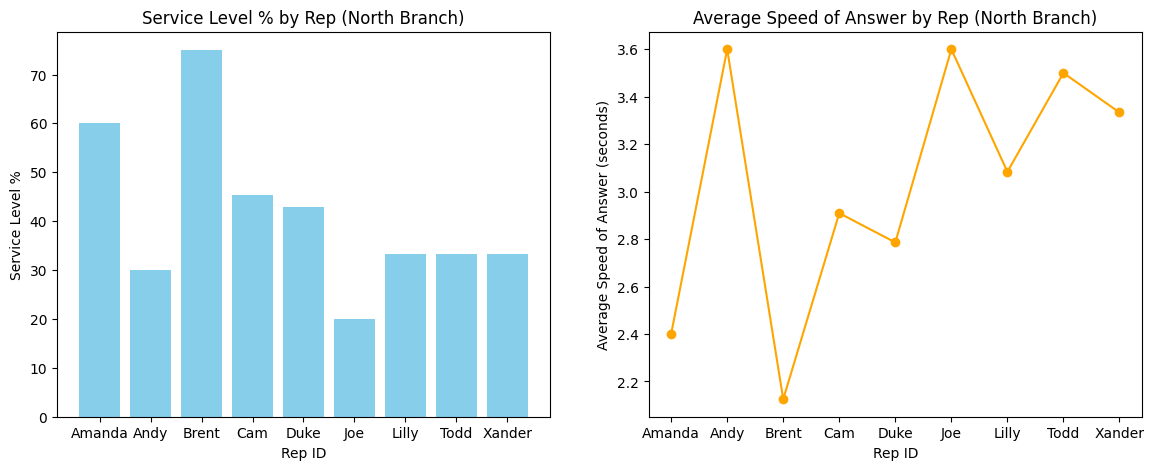

In [ ]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north = north_df
north_plt = north.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north[north["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north[north["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

#Your Code Here:

viz2 = pd.merge(
    north_plt,
    service_level[['Service Level %']],
    on='Rep ID'
)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

#Chart 1: Service Level % (Bar Chart)
axes[0].bar(
    viz2['Rep ID'],
    viz2['Service Level %'],
    color='skyblue' 
)

axes[0].set_xlabel('Rep ID')
axes[0].set_ylabel('Service Level %')
axes[0].set_title('Service Level % by Rep (North Branch)')


#Chart 2: Average Speed of Answer (Line Chart)
axes[1].plot(
    viz2["Rep ID"],
    viz2['Incoming Wait Time'],
    marker='o',
    linestyle='-',
    color='orange'
)

axes[1].set_xlabel('Rep ID')
axes[1].set_ylabel('Average Speed of Answer (seconds)')
axes[1].set_title('Average Speed of Answer by Rep (North Branch)')

plt.tight_layout
plt.show()

##### Record your answer below:

> Chart style you chose and why: I created two seperate charts. A bar chart for service level beause they make it easy to compare each rep's performance across a discrete category. And a line chart for average speed of answer to show trends between reps and highlight differences in response times.

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?

In [716]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

#Your Code Here:

#creating lists that contain number of calls for each purpose
incoming = [
    complaints.get('Incoming', 0),
    product_support.get('Incoming', 0),
    sales_support.get('Incoming', 0)
]

outgoing = [
    complaints.get('Outgoing', 0),
    product_support.get('Outgoing', 0),
    sales_support.get('Outgoing', 0)
]

Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                123
                 Incoming                 75
Name: count, dtype: int64


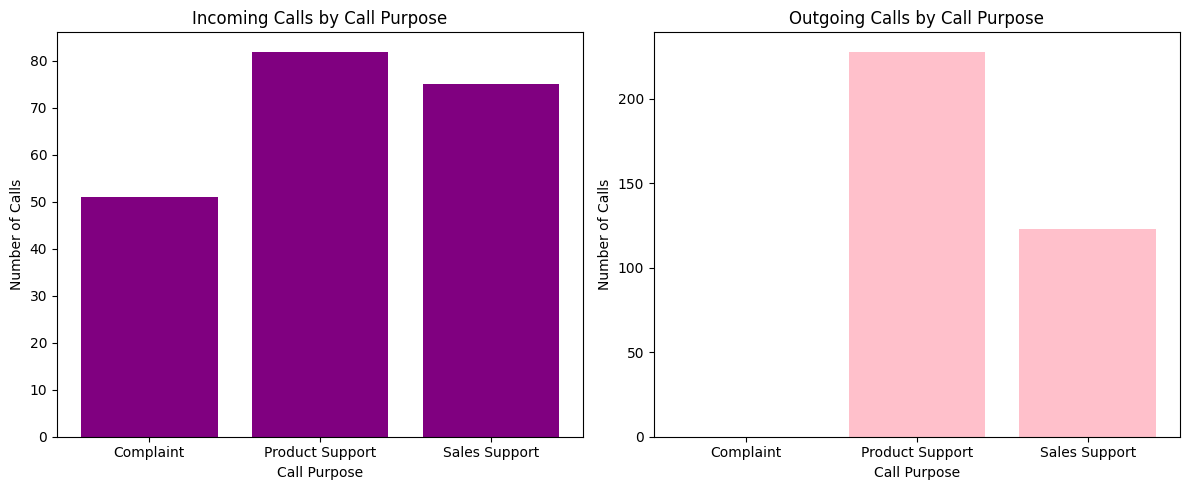

In [721]:
#Creating two side by side charts
fig, axes = plt.subplots(1,2, figsize=(12,5))

#Chart 1: Incoming Calls
axes[0].bar(call_purpose, incoming, color='purple')
axes[0].set_xlabel('Call Purpose')
axes[0].set_ylabel('Number of Calls')
axes[0].set_title('Incoming Calls by Call Purpose')

#Chart 2: Outgoing Calls
axes[1].bar(call_purpose, outgoing, color='pink')
axes[1].set_xlabel('Call Purpose')
axes[1].set_ylabel('Number of Calls')
axes[1].set_title('Outgoing Calls by Call Purpose')

plt.tight_layout()
plt.show()

##### Record your answer below:

> Chart style you chose and why: I chose two side by side bar charts, one for incoming and one for outgoing. This layout allows easy comparison of the number of calls for each purpose without confusing overlapping bars. 

## Task 5: Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer below:
> Your Answer: The South Branch seems to be opperating more efficiently. I based this off the average abandoment rate from the South Branch being 1.27 vs the North being at 2.86. The South branch also has a slightly better incoming wait time of 3.00 secs vs the North branch 3.05 secs. 


#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer below:
> Your Answer: Seeing as how the North Branch is already operating with 2 less reps and their numbers are slightly lower than the South Branch, I would assign the extra help to the North Branch.


#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer below:
> Your Answer: Minus the missing data from the incoming wait time, nothing I can think of. I feel like this was already a lot of data to process and, at this stage of my learning, I had everything I needed to complete the analysis.


## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer below:

> Chart style you chose and why: 

In [722]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot: